
## Movie Data Set

### <b>UseCase:<b> To clean and analyze the movie_dataset using EDA to 
    - Gain Insights 
    - Determining relationships in Data
    - Checking of assumptions
    - Represent the analysis using plots
    

### The prime analysis include the below questions/Relationships:<br>
1) What is the relation between Year and Movies Produced/Registered?<br>
2) Is there any relationship between duration and rating?<br>
3) Which Year produced most hit movies (liked by audience)<br>
4) Which Year generated maximum revenue?<br>
5) What is the relationship between Votes and Year?<br>
6) Which genre of movies are the most commonly produced?<br>
7) Which genre movies received highest positive reviews?<br>
8) Which genre generated highest revenue?<br>
9) How director plays a role in revenues and ratings?<br>
10) Who are the top performing actors?<br>


In [1]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

In [2]:
movie_data = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/1000%20movies%20data.csv")

In [3]:
#movie_data=pd.read_csv("C:/Users/brahmishreem/Desktop/1000_movies_data.csv")

In [4]:
movie_data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [5]:
movie_data.shape

(1000, 12)

In [6]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Rank                  1000 non-null int64
Title                 1000 non-null object
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    872 non-null float64
Metascore             936 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.8+ KB


In [7]:
movie_data.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [8]:
movie_data.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

### 1. Data Pre-Profiling

In [9]:
movieprofile = pandas_profiling.ProfileReport(movie_data)
movieprofile.to_file(outputfile="movie_before_preprocessing.html")

### 2.Data Preprocessing


In [10]:
movie_data.Metascore= movie_data.Metascore.fillna(movie_data['Metascore'].median()) #as Metascore data is -ve skewed

In [11]:
movie_data['Metascore'].median()

59.5

In [12]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Rank                  1000 non-null int64
Title                 1000 non-null object
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    872 non-null float64
Metascore             1000 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.8+ KB


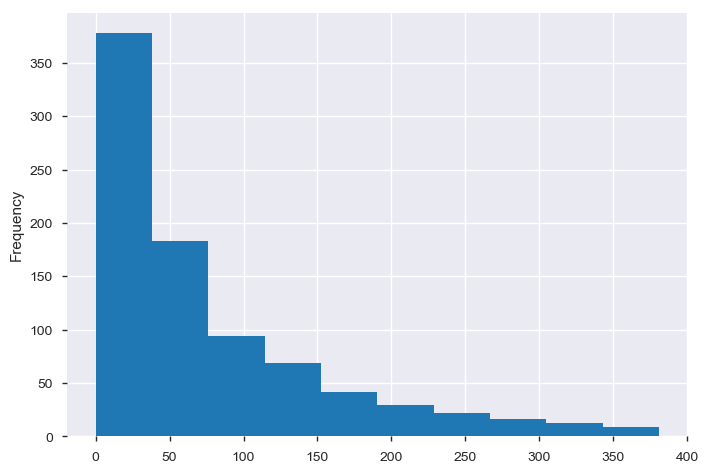

In [13]:
movie_data[movie_data['Revenue (Millions)']<400]['Revenue (Millions)'].plot.hist()

In [14]:
movie_data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [15]:
movie_data.rename(columns={'Revenue (Millions)': 'RevenueInM'}, inplace=True)
movie_data.RevenueInM.fillna(movie_data.RevenueInM.median(), inplace=True)

### 1) What is the relation between Year and Movies Produced/Registered?

Text(0.5, 1.0, 'Count of movies produced year wise')

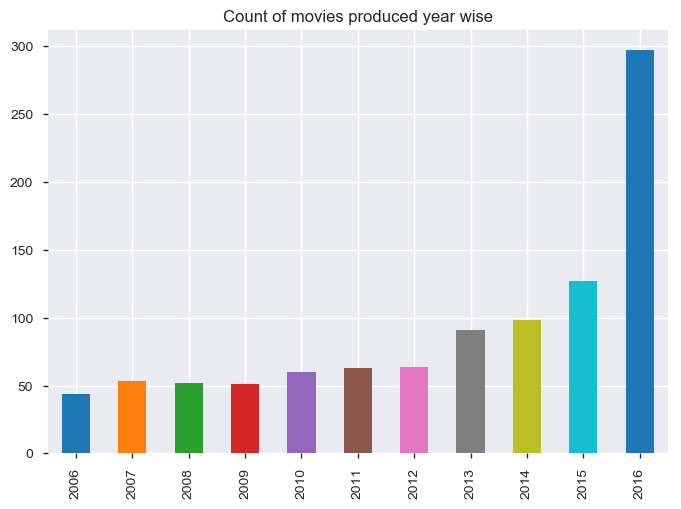

In [16]:
movie_data['Year'].value_counts().sort_index().plot.bar()
plt.title('Count of movies produced year wise')

#### The number of movies produced/registered has increased almost 5 folds from 2006 to 2016
#### It could be possible that much more movies were produced but those listed in Global DBs like IMDB might be less

### 2) Is there any relationship between duration and rating?

Text(0.5, 1.0, 'Relation between Rating and Duration of a movie using Scatter Plot')

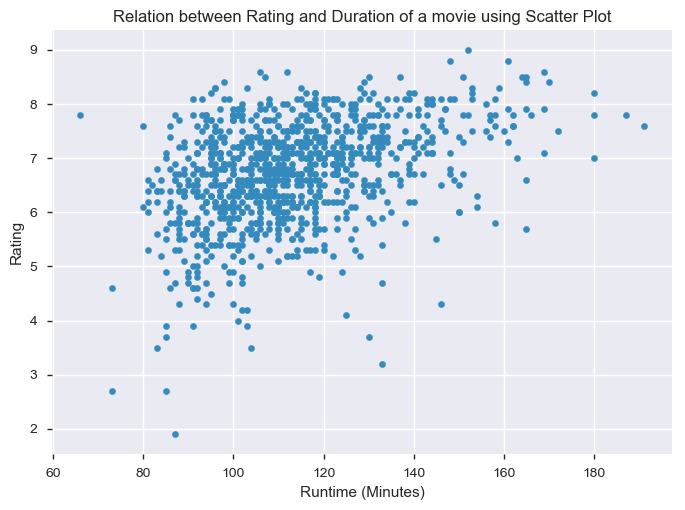

In [17]:
movie_data[['Runtime (Minutes)', 'Rating']].plot.scatter(x='Runtime (Minutes)', y='Rating')
plt.title('Relation between Rating and Duration of a movie using Scatter Plot')

Text(0.5, 1.0, 'Relation between Rating and Duration of a movie using HexPlot')

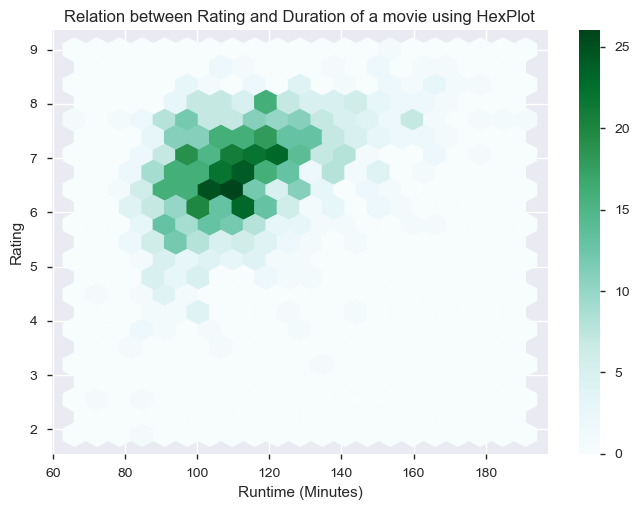

In [18]:
#As the data has too many overlapping points, choose to take HeatMap for better insight

movie_data.plot.hexbin(x='Runtime (Minutes)', y='Rating', gridsize=20)
plt.title('Relation between Rating and Duration of a movie using HexPlot')

#### Most average(6-7) rated movies are have a movie duration of 90-130 mins. The above graph doesnot give much detail insight on duration impacting the rating of a movie but we can conclude most movie duration range between 90-135 minutes.

In [19]:
#Function for categorizing numerals to categorical class
def categorizeRating(x):
    if x >= 8.5:
        return "Excellent"
    elif x >=7  and x <8.5:
        return "Good"
    elif x >=6.0  and x <7:
        return "Average"
    elif x >=4.5  and x <6.0:
        return "Poor"
    else:
        return "Worst"

In [20]:
movie_data['MetacriticRating']= (movie_data['Metascore']/10)            #Standardise the metascore data with Rating

In [21]:
movie_data['RatingClass'] = movie_data['Rating'].apply(categorizeRating)         #Classifying Ratings into categories
movie_data['MetaScoreClass'] = movie_data['MetacriticRating'].apply(categorizeRating)         #Classifying MetacriticRating into categories

C:\Users\brahmishreem\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Rating distribution againt duration')

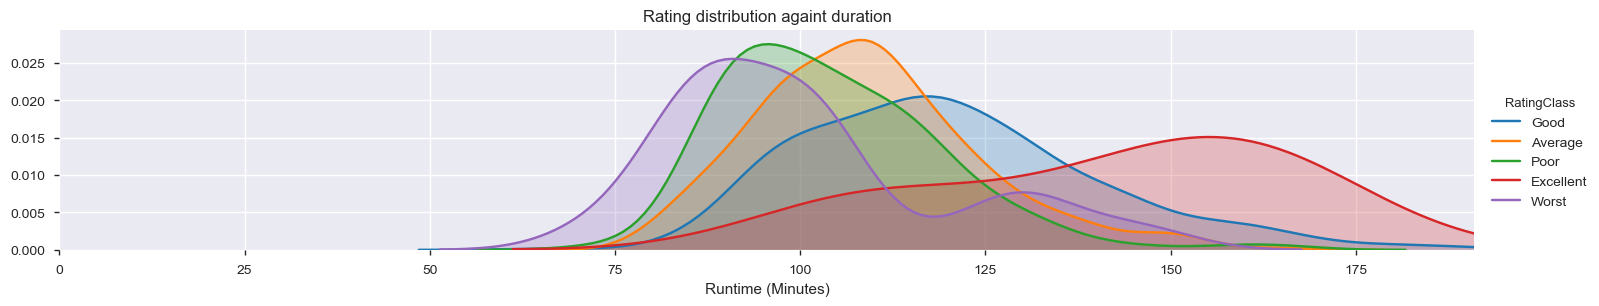

In [22]:
as_fig = sns.FacetGrid(movie_data,hue='RatingClass',aspect=5)
as_fig.map(sns.kdeplot,'Runtime (Minutes)',shade=True)
oldest = movie_data['Runtime (Minutes)'].max()
as_fig.set(xlim=(0,oldest))
as_fig.add_legend()
plt.title('Rating distribution againt duration')

#### The excellent rated movies has high variance with duration(graph is platykurtic) while worst performing movies mostly ranged between 85-105 mins.

Text(0.5, 1.0, 'MetaScoreClass distribution againt duration')

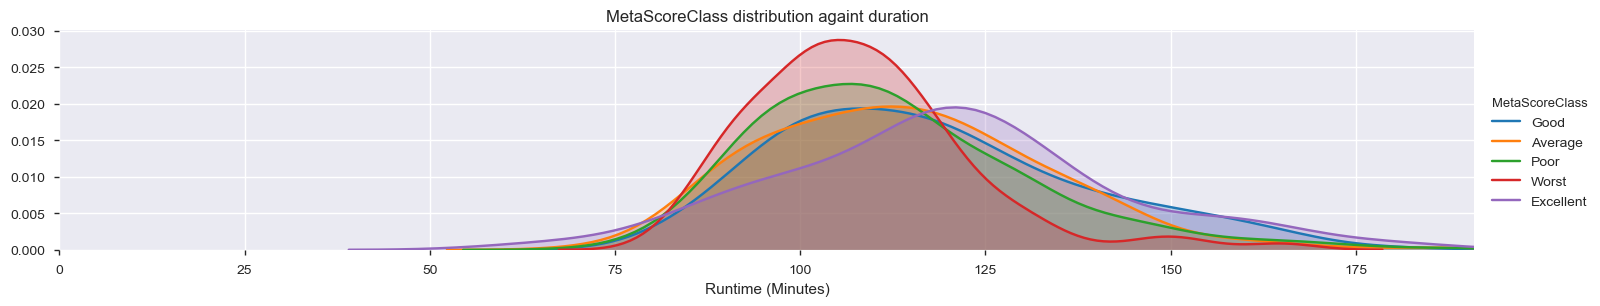

In [23]:
as_fig = sns.FacetGrid(movie_data,hue='MetaScoreClass',aspect=5)
as_fig.map(sns.kdeplot,'Runtime (Minutes)',shade=True)
oldest = movie_data['Runtime (Minutes)'].max()
as_fig.set(xlim=(0,oldest))
as_fig.add_legend()
plt.title('MetaScoreClass distribution againt duration')

#### The metacritic ratings against duration is almost same for each category ranged between 85-105 mins with the excellent mmovies having slightly greater duration 

### We cannot much conclude if duration has any role to play with the sucess(Ratings) of the movie

<p/>

Text(0.5, 1.0, 'Duration and Year wise plot')

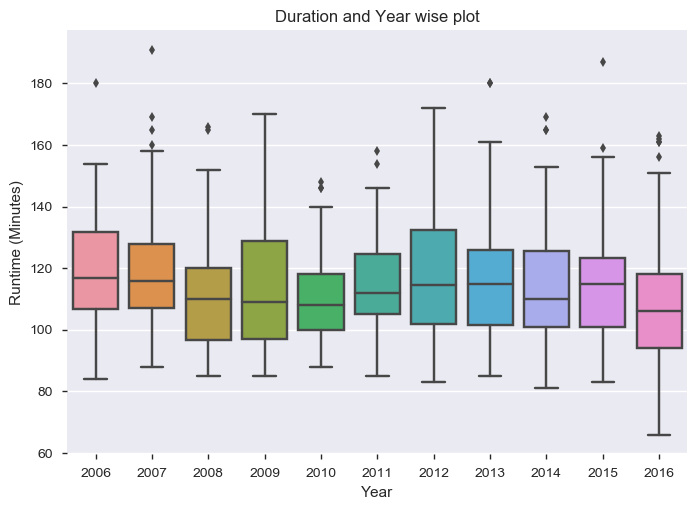

In [24]:
sns.boxplot('Year','Runtime (Minutes)',data=movie_data)
plt.title("Duration and Year wise plot")

### The average duration of movies each year ranges between 100-120 minutes.

<p/>

In [25]:
movie_data['RatingClass'] = movie_data['Rating'].apply(categorizeRating)                      #Classifying Ratings into categories

In [26]:
movie_data['MetaScoreClass'] = movie_data['MetacriticRating'].apply(categorizeRating)         #Classifying Ratings into categories

In [27]:
movie_data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,RevenueInM,Metascore,MetacriticRating,RatingClass,MetaScoreClass
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,7.6,Good,Good
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,6.5,Good,Average
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,6.2,Good,Average
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,5.9,Good,Poor
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,4.0,Average,Worst


### 3) Which Year produced most hit movies (liked by audience)

In [28]:
good_movies = movie_data[(movie_data['RatingClass']=='Good') | (movie_data['RatingClass']=='Excellent'  )]    # Filter out the high rated movies

In [29]:
excellent_movies = movie_data[(movie_data['RatingClass']=='Excellent'  )] 

Text(0.5, 1.0, 'Count plot for year wise of movies produced')

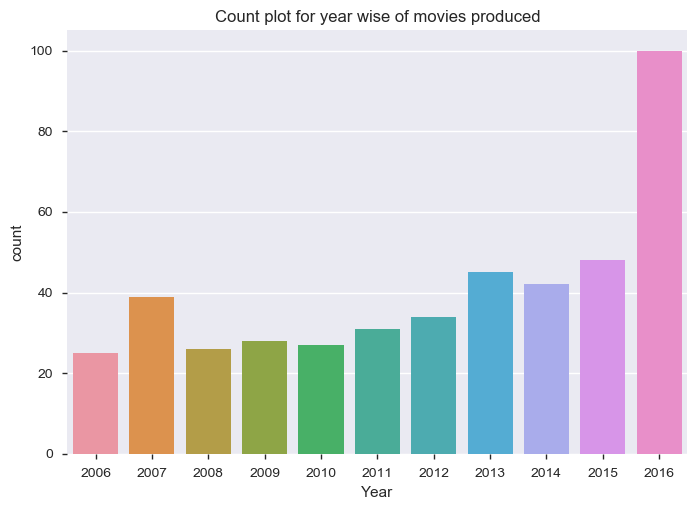

In [30]:
sns.countplot('Year',data=good_movies)
plt.title('Count plot for year wise of movies produced')

As per graph, 2016 produced most number of hit movies. However, the data is not <b>standadized</b> as the no of movie produced each year varies and cannot be concluded. So, we take the percentage.

In [31]:
movie_data.groupby(['Year'])['Year'].count()

Year
2006     44
2007     53
2008     52
2009     51
2010     60
2011     63
2012     64
2013     91
2014     98
2015    127
2016    297
Name: Year, dtype: int64

Text(0.5, 1.0, 'Plot shows the hit(rating above 7) produced each year')

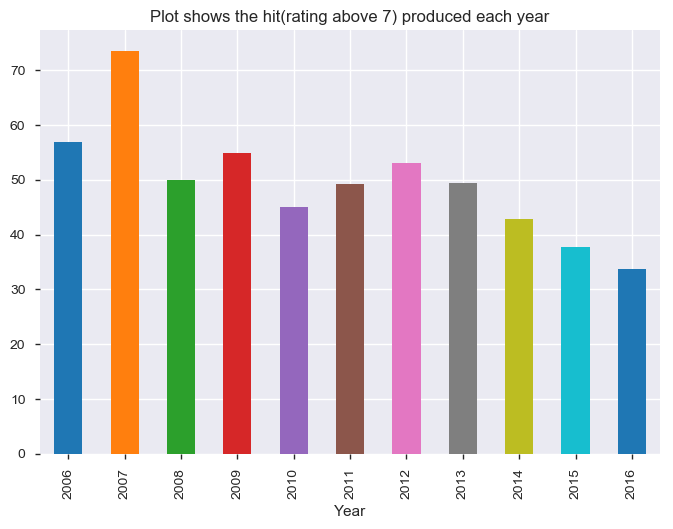

In [32]:
((good_movies.groupby(['Year'])['Year'].count()/movie_data.groupby(['Year'])['Year'].count())*100).plot.bar()
plt.title("Plot shows the hit(rating above 7) produced each year")

#### 1) Year 2007 produced most of the hit movies while 2006 produced maximum number of high rated movies
#### 2) Although 2016 produced a highest quantity of movies, quality wise it scored the lowest.

Text(0.5, 1.0, 'Superhit movies(rating above 8.5) produced each year')

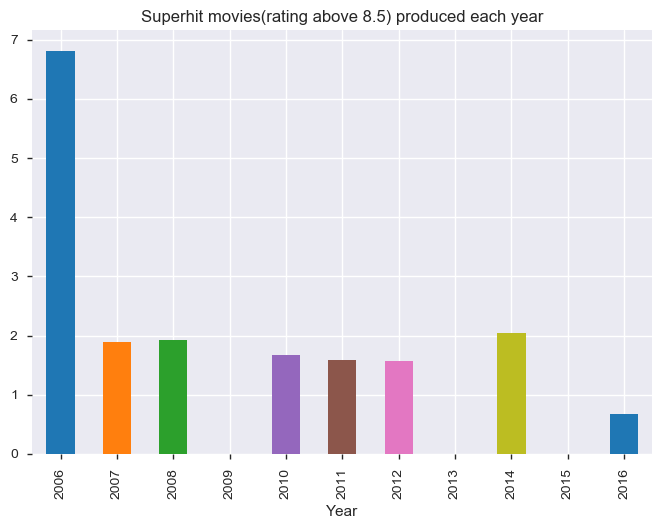

In [33]:
((excellent_movies.groupby(['Year'])['Year'].count()/movie_data.groupby(['Year'])['Year'].count())*100).plot.bar()
plt.title("Superhit movies(rating above 8.5) produced each year")

Text(0.5, 1.0, 'Year wise contribution of only super hit movies')

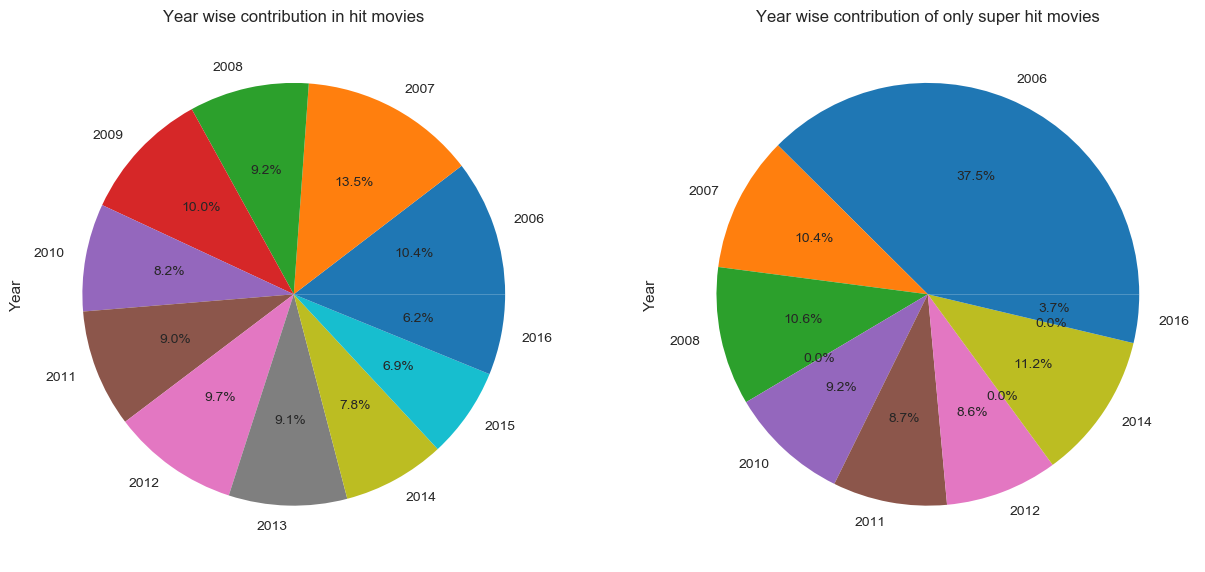

In [34]:
f,ax = plt.subplots(1,2,figsize=(15,7))

((good_movies.groupby(['Year'])['Year'].count()/movie_data.groupby(['Year'])['Year'].count())*100).plot.pie(autopct='%1.1f%%', ax=ax[0])
((excellent_movies.groupby(['Year'])['Year'].count()/movie_data.groupby(['Year'])['Year'].count())*100).plot.pie(autopct='%1.1f%%', ax=ax[1])
ax[0].set_title('Year wise contribution in hit movies')
ax[1].set_title('Year wise contribution of only super hit movies')

#### <b>2007</b>, produced large number of hit movies, followed by <b>2006, 2009</b>
If we consider only the super hits <b>2006,  was the golden year in the film industry</b> and alone constituted <b>37.5</b> share of excellent rated movies<br>
2009, 2013, 2015 had no superhit movies

<p>

Text(0.5, 1.0, 'Year wise Metascore ratings')

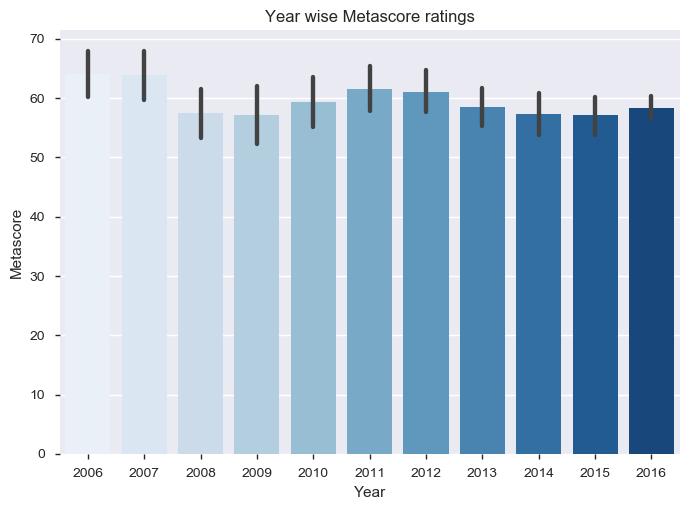

In [35]:
sns.barplot(x="Year", y="Metascore", data=movie_data, palette="Blues")
plt.title("Year wise Metascore ratings")

##### 2006,2007 had movies with highest number of positive reviews
<p>
    

### 4) Which Year generated maximum revenue?


In [36]:
movie_data.groupby("Year").RevenueInM.sum().reset_index()

,Year,RevenueInM
0,2006,3720.430
1,2007,4498.170
2,2008,5101.205
3,2009,5484.200
4,2010,6133.605
5,2011,5479.945
6,2012,6910.290
7,2013,7810.675
8,2014,8189.340
9,2015,9525.910


In [37]:
movie_data.groupby("Year").RevenueInM.sum()/movie_data.groupby(['Year'])['Year'].count()

Year
2006     84.555227
2007     84.871132
2008     98.100096
2009    107.533333
2010    102.226750
2011     86.983254
2012    107.973281
2013     85.831593
2014     83.564694
2015     75.007165
2016     52.613704
dtype: float64

Text(0.5, 1.0, 'Year wise Revenue generated')

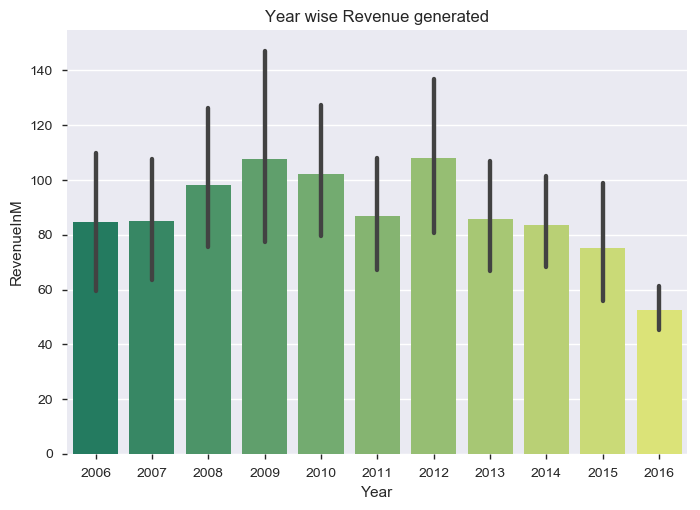

In [38]:
sns.barplot(x="Year", y="RevenueInM", data=movie_data, palette="summer")
plt.title("Year wise Revenue generated")

 1) Year 2016 has generated a total revenue of <b>15626.270M</b><p>
 2) However considering the number of released per year, <b>2009</b> and <b>2012</b> has the highest revenue while 2016 had least revenue in comparision</p> 
 3) In 2016, as the number of hit and superhit movies released is the lowest. It has directly impacted the revenue.

In [39]:
movie_data.corr()

,Rank,Year,Runtime (Minutes),Rating,Votes,RevenueInM,Metascore,MetacriticRating
Rank,1.000000,-0.261605,-0.221739,-0.219555,-0.283876,-0.259607,-0.184922,-0.184922
Year,-0.261605,1.000000,-0.164900,-0.211219,-0.411904,-0.146589,-0.075970,-0.075970
Runtime (Minutes),-0.221739,-0.164900,1.000000,0.392214,0.407062,0.272955,0.202079,0.202079
Rating,-0.219555,-0.211219,0.392214,1.000000,0.511537,0.218448,0.604522,0.604522
Votes,-0.283876,-0.411904,0.407062,0.511537,1.000000,0.638758,0.317268,0.317268
RevenueInM,-0.259607,-0.146589,0.272955,0.218448,0.638758,1.000000,0.141381,0.141381
Metascore,-0.184922,-0.075970,0.202079,0.604522,0.317268,0.141381,1.000000,1.000000
MetacriticRating,-0.184922,-0.075970,0.202079,0.604522,0.317268,0.141381,1.000000,1.000000


<p>

### 5) What is the relationship between Votes and Year?

Text(0.5, 1.0, 'Relationship between Votes and Year')

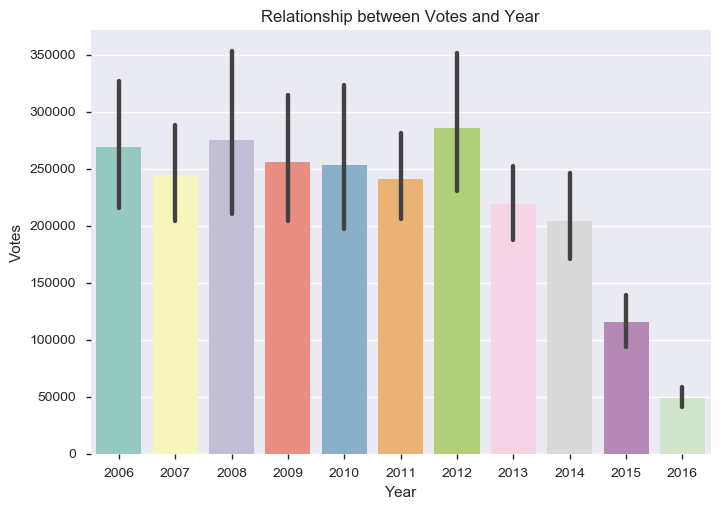

In [40]:
sns.barplot(x="Year", y="Votes", data=movie_data, palette="Set3")
plt.title("Relationship between Votes and Year")

##### 1) From the plot, 2012 has the highest number of votes.
##### 2) After 2012, the number of votes have been declining. 
#### Could it be that the other entertainment sources(Netflix/Amazon Originals, Youtube webseries/channels etc) have gained more popularty and have better content in recent years. Therefore, people focus is distributed leading to  low votes and revenue


In [41]:
movie_data.groupby("Year").Votes.sum()/movie_data.groupby(['Year'])['Year'].count()

Year
2006    269289.954545
2007    244331.037736
2008    275505.384615
2009    255780.647059
2010    252782.316667
2011    240790.301587
2012    285226.093750
2013    219049.648352
2014    203930.224490
2015    115726.220472
2016     48591.754209
dtype: float64

In [42]:
### How UserRating, Critic Rating impact the votes?

C:\Users\brahmishreem\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


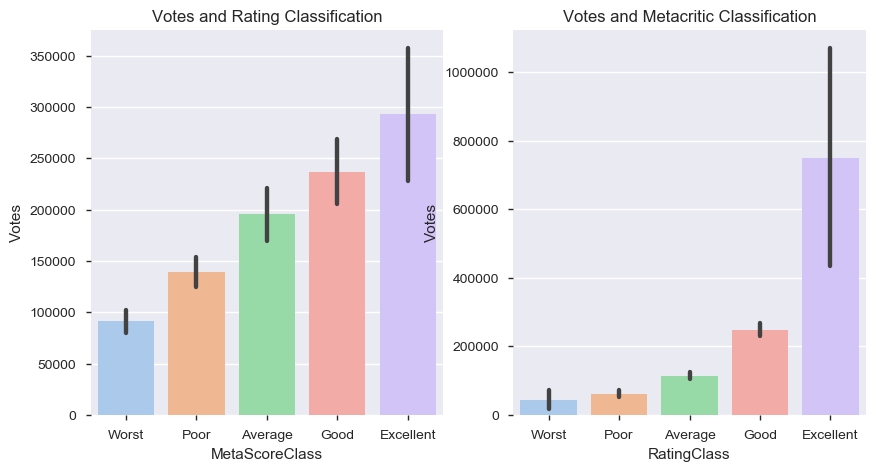

In [43]:
fig, ax =plt.subplots(1,2, figsize=(10,5))
a=sns.barplot(x="MetaScoreClass", y="Votes", data=movie_data, palette="pastel",  ax=ax[0], order=["Worst", "Poor","Average","Good", "Excellent"])
b=sns.barplot(x="RatingClass", y="Votes", data=movie_data, palette="pastel",  ax=ax[1], order=["Worst", "Poor","Average","Good", "Excellent"])
a.title.set_text('Votes and Rating Classification')
b.title.set_text('Votes and Metacritic Classification')
fig.show()


#### The high rated movies both critically acclaimed and user ratings states that <b>More the votes, merrier the ratings<b/>

<p/>

## 6) Which genre of movies are the most commonly produced?

##### Number of movies produced in each genre

In [44]:
#movie_data.groupby("PrimeGenre").PrimeGenre.count()
movies1 = movie_data.assign(PrimeGenre1=movie_data['Genre'].str.split(',').str[0])
movies2 = movie_data.assign(PrimeGenre1=movie_data['Genre'].str.split(',').str[1])
movies3 = movie_data.assign(PrimeGenre1=movie_data['Genre'].str.split(',').str[2])

#moviename1-Action, Comedy, Drama

#Movie1-Action
#Movie1-Comedy
#Movie1-Drama

#remove leading white spaces
movies2['PrimeGenre1']=movies2['PrimeGenre1'].str.lstrip()
movies3['PrimeGenre1']=movies3['PrimeGenre1'].str.lstrip()

movies=pd.concat([movies1,movies2,movies3], axis=0)
movies.groupby("PrimeGenre1").PrimeGenre1.count().sort_values()

PrimeGenre1
Musical        5
Western        7
War           13
Music         16
Sport         18
History       29
Animation     49
Family        51
Biography     81
Fantasy      101
Mystery      106
Horror       119
Sci-Fi       120
Romance      141
Crime        150
Thriller     195
Adventure    259
Comedy       279
Action       303
Drama        513
Name: PrimeGenre1, dtype: int64

In [45]:
#del movies

Text(0.5, 1.0, 'Movies produced in each genre')

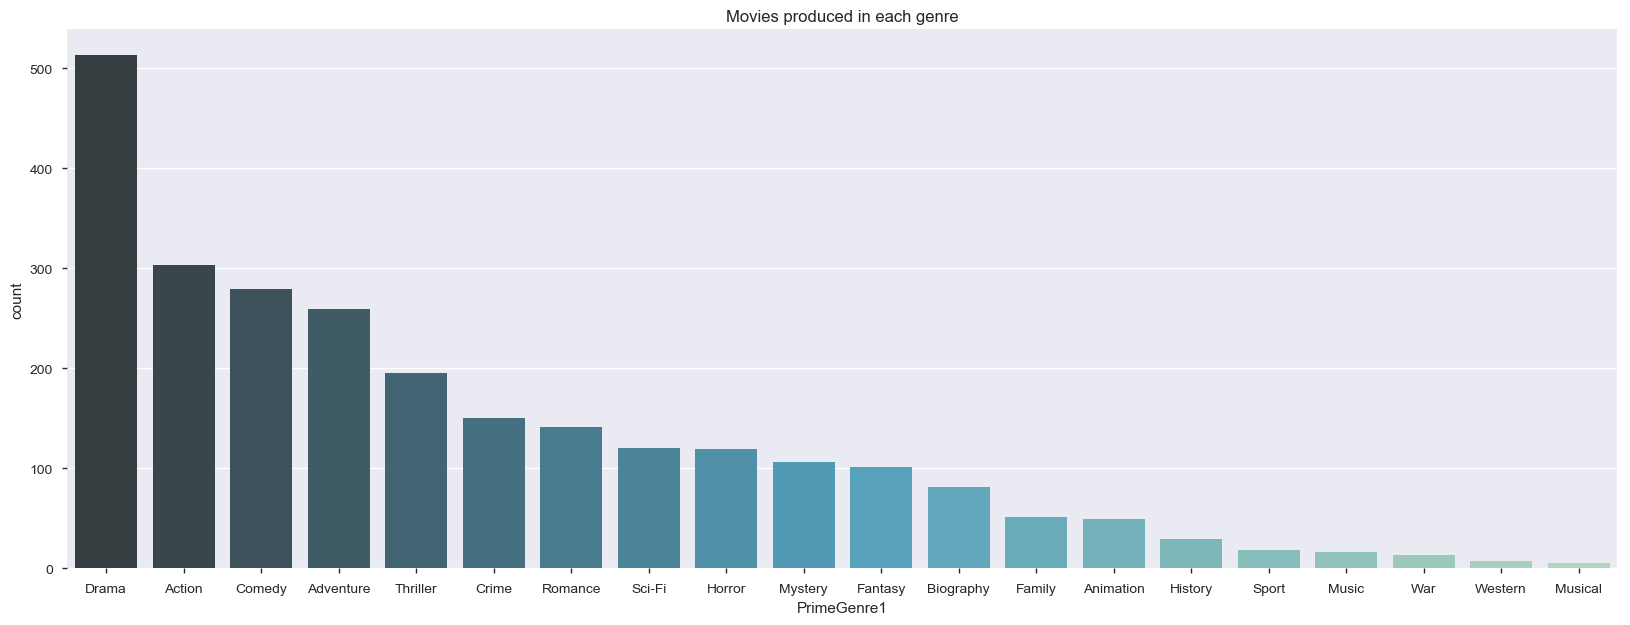

In [46]:
fig, ax =plt.subplots( figsize=(20,7))
#sns.countplot('PrimeGenre',data=movie_data, palette="GnBu_d", order=movie_data['PrimeGenre'].value_counts().index)
sns.countplot('PrimeGenre1',data=movies, palette="GnBu_d", order=movies['PrimeGenre1'].value_counts().index)
plt.title("Movies produced in each genre")

##### 1) <b>Drama</b> Genre is the clear winner with total of <b>513</b> movies followed by Action with 303 categoried under it </br> 2) Western and Musical genre were <b>least</b> produced.
The dominance of drama as a genre is perhaps not surprising when we consider the following:
* Drama is the cheapest genre to produce as movies don’t necessarily require special sets, costumes, locations, props, special/visual effects, etc.
* Drama has the broadest definition of all genres – everything that happens anywhere ever is a drama. Conversely, other genres have a higher bar for classification, such as the need for high-octane events for a movie to be classed as Action, scary events to be Horror, funny elements to be a Comedy, etc.

<p>
    <p>

### 7) Which genre movies received highest positive reviews?

In [47]:
#df.nlargest(10, ['Weight']) 
result=movies.groupby(["PrimeGenre1"])['Metascore'].aggregate(np.mean).reset_index().sort_values('Metascore', ascending=False)
result.iloc[0:4,:]


,PrimeGenre1,Metascore
9,History,70.465517
2,Animation,70.091837
3,Biography,67.777778
18,War,64.115385


Text(0.5, 1.0, 'Reviews and Genre')

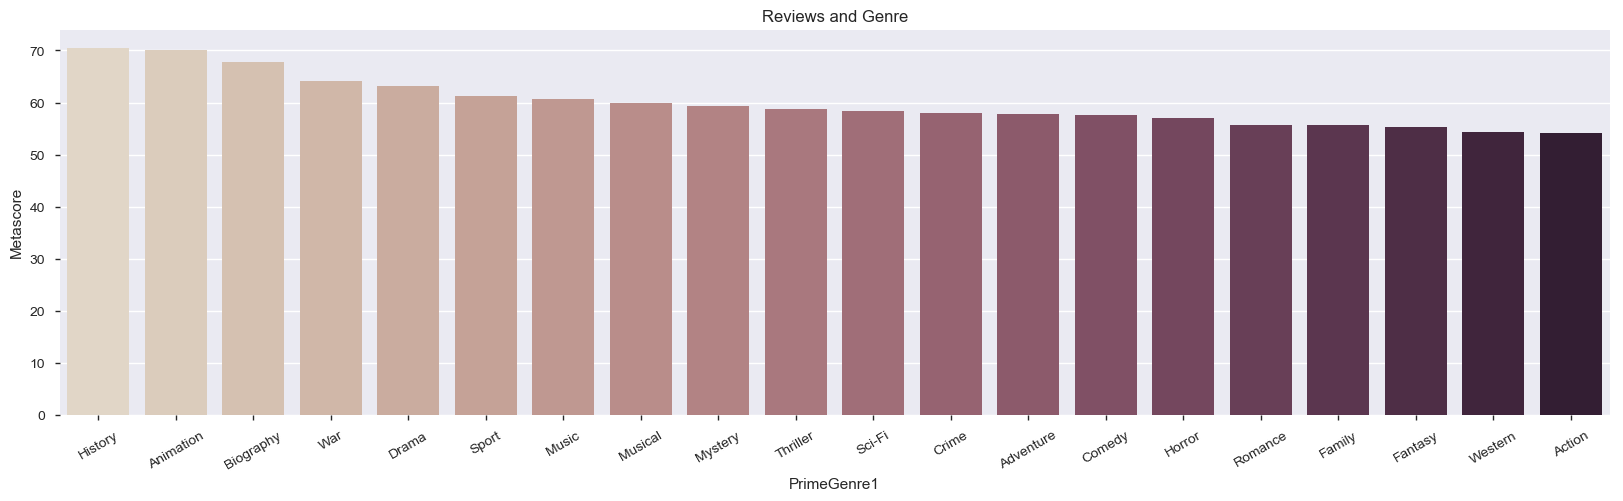

In [48]:
fig, ax =plt.subplots( figsize=(20,5))
#genRating=((movies.groupby("PrimeGenre1").Metascore.sum()).sort_values(ascending=False)).plot.bar()
#genRating=sns.countplot(x="PrimeGenre1", data=movies, palette="ch:.25",order = movies['PrimeGenre1'].value_counts().index)
genRating=sns.barplot(x="PrimeGenre1",y="Metascore", data=result, palette="ch:.25")
for item in genRating.get_xticklabels():
    item.set_rotation(30)
plt.title('Reviews and Genre')

#### History, Animation, Biography, War are the with top genres with highest positive reviews.

<p>

### 8) Which genre generated highest revenue?

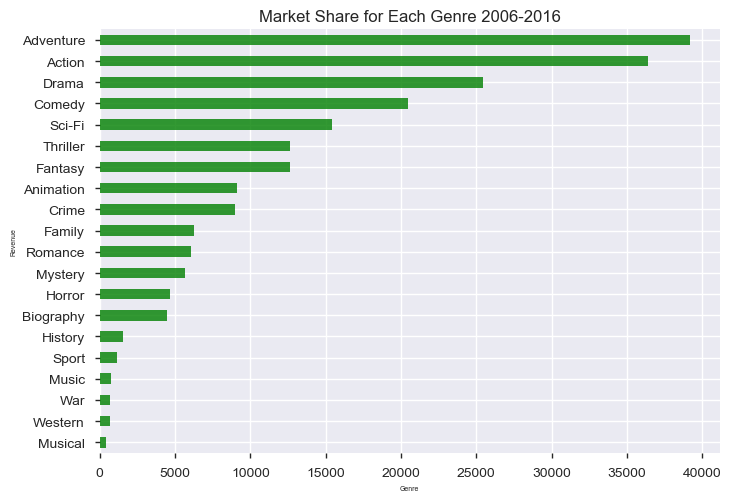

In [49]:
movies.groupby("PrimeGenre1").RevenueInM.sum().sort_values().plot.barh(color=(0.0, 0.5, 0.0, 0.8))
plt.xlabel('Genre', fontsize=5)
plt.ylabel('Revenue', fontsize=5)
plt.title('Market Share for Each Genre 2006-2016')
plt.show()

#### Adventure, Action,Drama & Comedy were the genre generating highest revenues.

<p>

### 9) How director plays a role in revenues and ratings?

As there is a high cardinality in the director column, we are considering the directors who have directed atleast 4 movies 

Capture top directors

In [50]:
#Let us filter some of the directors who have produced hit movies and have done atleast 4 Movies 
good_dir=good_movies.groupby("Director").filter(lambda x: len(x) > 3)
#good_dir.head()

In [51]:
good_dir.groupby(['Director'])['Director'].count()

Director
Christopher Nolan    5
Clint Eastwood       4
Danny Boyle          5
David Fincher        5
David Yates          5
Denis Villeneuve     4
Guy Ritchie          4
J.J. Abrams          4
Jon Favreau          4
Martin Scorsese      5
Matthew Vaughn       4
Quentin Tarantino    4
Ridley Scott         4
Name: Director, dtype: int64

C:\Users\brahmishreem\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


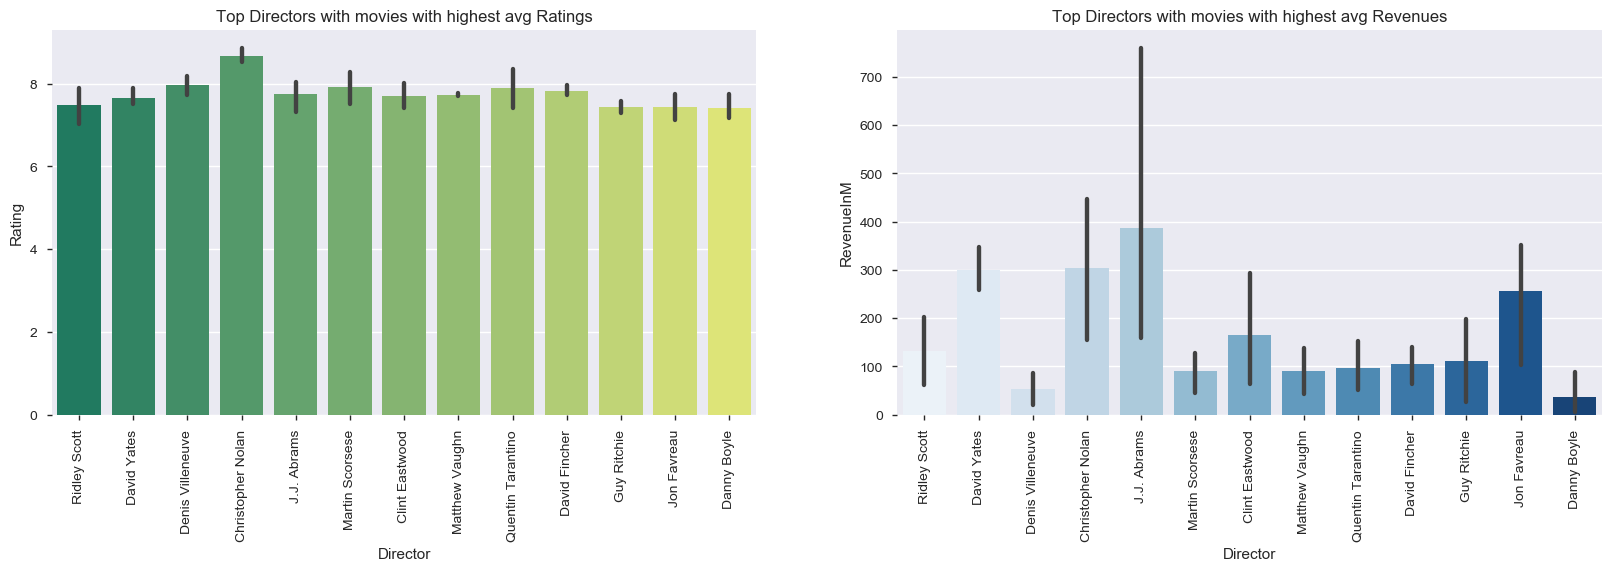

In [52]:
fig, ax =plt.subplots(1,2, figsize=(20,5))
sDV=sns.barplot(x="Director", y="Rating", data=good_dir, palette="summer",  ax=ax[0])
sDR=sns.barplot(x="Director", y="RevenueInM", data=good_dir, palette="Blues",  ax=ax[1])
sDV.title.set_text('Top Directors with movies with highest avg Ratings')
sDR.title.set_text('Top Directors with movies with highest avg Revenues')
for item in sDV.get_xticklabels():
    item.set_rotation(90)
for item in sDR.get_xticklabels():
    item.set_rotation(90)
fig.show()

#### Data suggests that Nolan Movies have the highest avg ratings while J.J Abrams movies get more revenues

In [53]:
resultR=good_dir.groupby(["Director"])['Rating'].aggregate(np.mean).reset_index().sort_values('Rating', ascending=False)
resultR.iloc[0:4,:]  
#result

,Director,Rating
0,Christopher Nolan,8.680
5,Denis Villeneuve,7.975
9,Martin Scorsese,7.920
11,Quentin Tarantino,7.900


Christopher Nolan tops the score board with highest number top rated movies

In [54]:
result=good_dir.groupby(["Director"])['RevenueInM'].aggregate(np.mean).reset_index().sort_values('RevenueInM', ascending=False)
result.iloc[0:4,:] 

,Director,RevenueInM
7,J.J. Abrams,387.5175
0,Christopher Nolan,303.0180
4,David Yates,300.7840
8,Jon Favreau,256.4000


In [55]:
#Directors with most positive reviews
result=good_dir.groupby(["Director"])['Metascore'].aggregate(np.mean).reset_index().sort_values('Metascore', ascending=False)
#result.head() 

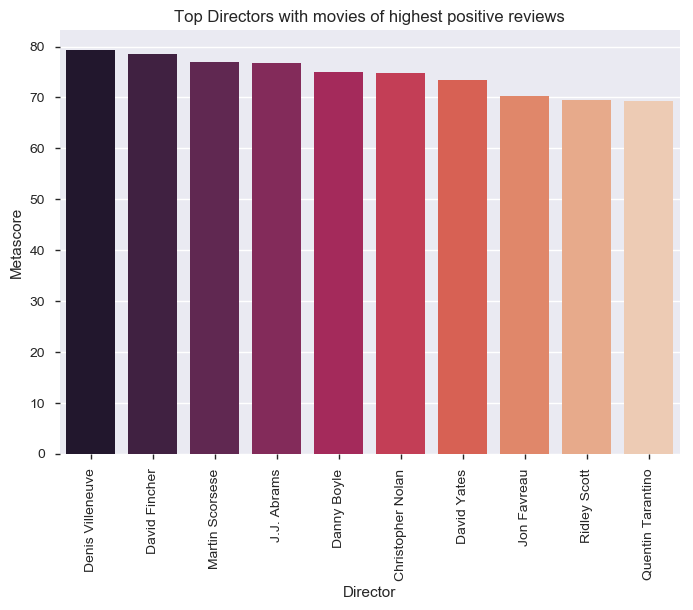

In [56]:
sDR=sns.barplot(x="Director", y="Metascore", data=result.iloc[0:10,:] ,palette="rocket")
plt.title("Top Directors with movies of highest positive reviews")
for item in sDR.get_xticklabels():
    item.set_rotation(90)

<p/>

### 10) Who are the top performing actors?

In [57]:
#dist1= good_movies['Actors'].str.split(',').str[0]
dist1 = good_movies.assign(Actor1=good_movies['Actors'].str.split(',').str[0])
dist2 = good_movies.assign(Actor1=good_movies['Actors'].str.split(',').str[1])
dist3 = good_movies.assign(Actor1=good_movies['Actors'].str.split(',').str[2])
dist4 = good_movies.assign(Actor1=good_movies['Actors'].str.split(',').str[3])

In [58]:
#dist4.head()

In [59]:
#remove leading white spaces
dist2['Actor1']=dist2['Actor1'].str.lstrip()
dist3['Actor1']=dist3['Actor1'].str.lstrip()
dist4['Actor1']=dist4['Actor1'].str.lstrip()

In [60]:
#concat all 3 datasets
actorPreProcess=pd.concat([dist1, dist2,dist3,dist4 ], axis=0)  

In [61]:
#del topActors_MovieData

In [62]:
topActors_MovieData=actorPreProcess.groupby('Actor1').filter(lambda x: len(x) > 4)         #filter dataset wth actors having done more  than 3 movies

In [63]:
topactors=actorPreProcess.groupby('Actor1')['Actor1'].count().sort_values(ascending=False)
topactors[topactors>6]
topactors.head(10)

Actor1
Robert Downey Jr.     12
Brad Pitt             11
Tom Hardy             10
Leonardo DiCaprio     10
Jennifer Lawrence      8
Michael Fassbender     8
Scarlett Johansson     8
Jake Gyllenhaal        8
Ryan Gosling           8
Amy Adams              8
Name: Actor1, dtype: int64

Text(0.5, 1.0, 'Top Actors with highest no of Hit Movies')

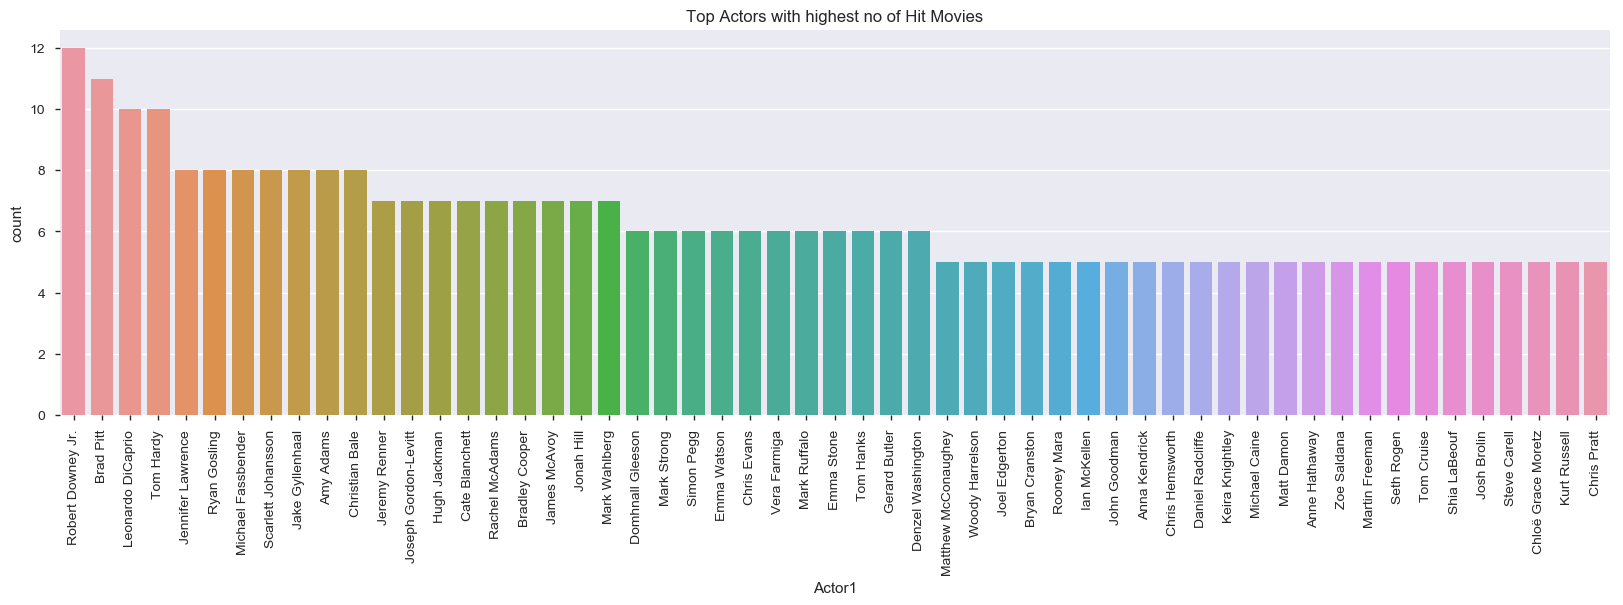

In [64]:
fig, ax =plt.subplots( figsize=(20,5))
#actors=sns.countplot('Actor1',data=topActors_MovieData, order = topActors_MovieData['Actor1'].value_counts().index)
actors=sns.countplot('Actor1',data=topActors_MovieData, order = topActors_MovieData['Actor1'].value_counts().index)
for item in actors.get_xticklabels():
    item.set_rotation(90)
plt.title("Top Actors with highest no of Hit Movies")

#### List of Actors with maximum hit movies<br/>
Robert Downey Jr.       <b>12</b> hit movies <br/>
Brad Pitt               <b>11</b> hit movies <br/>
Tom Hardy & Leonardo DiCaprio <b>10</b> hit movies <br/>
Ryan Gosling, Jake Gyllenhaal, Michael Fassbender, Amy Adams, Christian Bale   <b>8</b> hit movies <br/>
<p>
    <b>Scarlet Johansen, Jenifer lawerence & Amy Adams</b> were some of the top female actressess having starred in most hit movies

In [65]:
#Data manipulaton & filtering for deriving Actors 
dist1 = movie_data.assign(Actor1=movie_data['Actors'].str.split(',').str[0])
dist2 = movie_data.assign(Actor1=movie_data['Actors'].str.split(',').str[1])
dist3 = movie_data.assign(Actor1=movie_data['Actors'].str.split(',').str[2])
dist4 = movie_data.assign(Actor1=movie_data['Actors'].str.split(',').str[3])
dist2['Actor1']=dist2['Actor1'].str.lstrip()
dist3['Actor1']=dist3['Actor1'].str.lstrip()
dist4['Actor1']=dist4['Actor1'].str.lstrip()
actorRPreProcess=pd.concat([dist1, dist2,dist3,dist4 ], axis=0)  
result=actorRPreProcess.groupby(["Actor1"])['RevenueInM'].aggregate(np.sum).reset_index().sort_values('RevenueInM', ascending=False)
result=result.head(20)

Text(0.5, 1.0, 'Top Actors with highest Revenues')

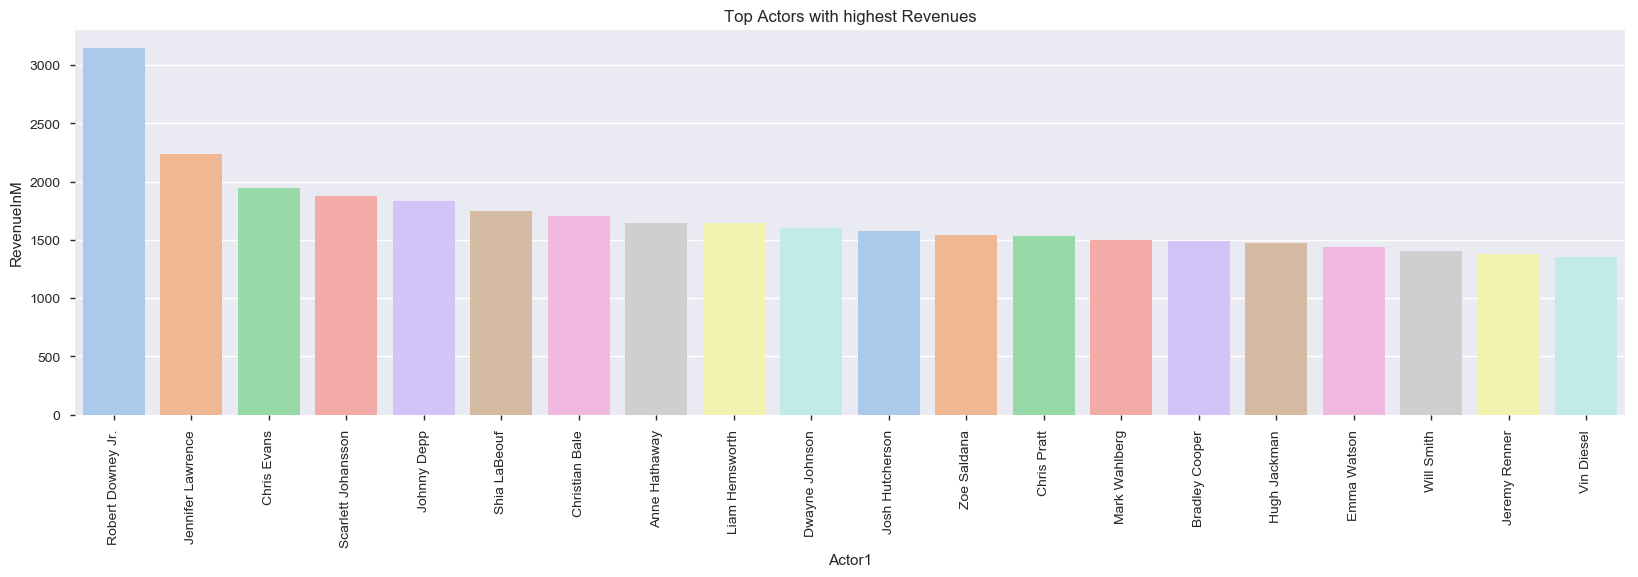

In [66]:
fig, ax =plt.subplots( figsize=(20,5))
rev=sns.barplot(x="Actor1", y="RevenueInM", data=result, palette="pastel",order = result["Actor1"])
for item in rev.get_xticklabels():
    item.set_rotation(90)
plt.title("Top Actors with highest Revenues")

##### Top 5 Actors with films with highest total revenue
Robert Downey Jr.	  3147.370<br>
Jennifer Lawrence	  2239.805<br>
Chris Evans	          1949.010<br>
Scarlett Johansson	  1874.970<br>
Johnny Depp	          1837.185<br>

### Correlation of all parameters in the dataset

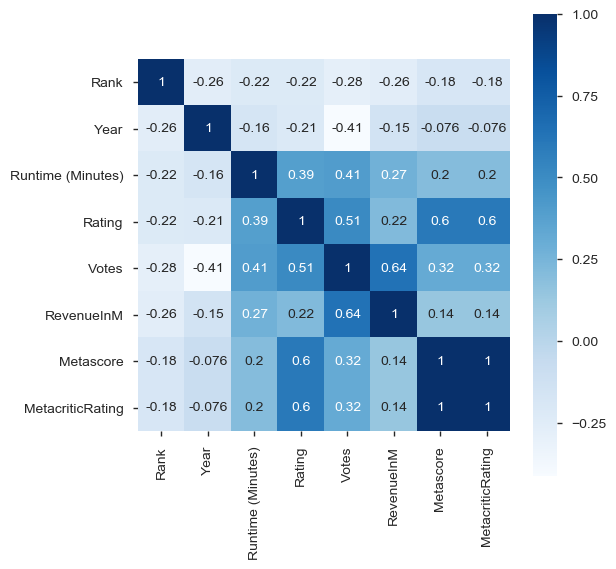

In [67]:
#Corelation
features_correlation = movies.corr()
plt.figure(figsize=(6,6))
sns.heatmap(features_correlation,vmax=1,square=True,annot=True,cmap='Blues')
plt.show()

*Year and Votes are negatively correlated<br>
*Revenue and Votes are highly Correlated<br>
*Metascore and Metacritic rating are the same(basically standadized to bring in same scale with Rating)


C:\Users\brahmishreem\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


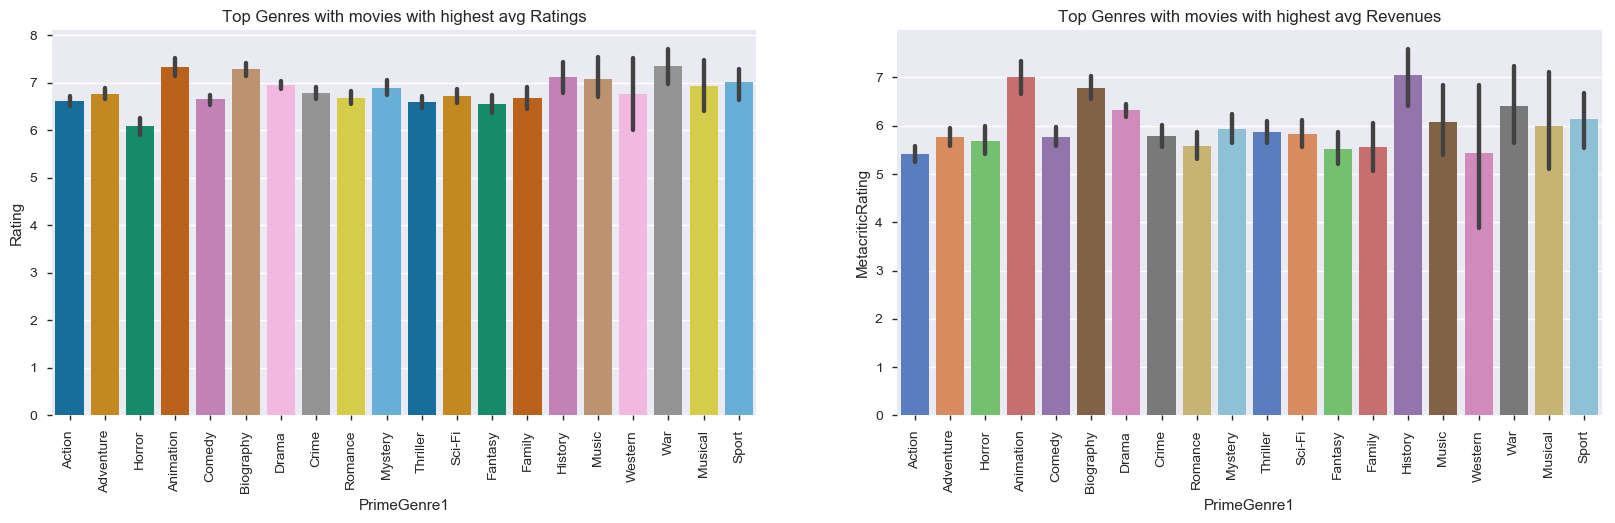

In [68]:
fig, ax =plt.subplots(1,2, figsize=(20,5))
sDV=sns.barplot(x="PrimeGenre1", y="Rating", data=movies, palette="colorblind",  ax=ax[0])
sDR=sns.barplot(x="PrimeGenre1", y="MetacriticRating", data=movies, palette="muted",  ax=ax[1])
sDV.title.set_text('Top Genres with movies with highest avg Ratings')
sDR.title.set_text('Top Genres with movies with highest avg Revenues')
for item in sDV.get_xticklabels():
    item.set_rotation(90)
for item in sDR.get_xticklabels():
    item.set_rotation(90)
fig.show()

In [69]:
#movies['RatingClass'].apply(lambda x: 'Hit' if ((x=='Good') | (x=='Excellent')) else 'NotHit')
#movies['MetaScoreClass'].apply(lambda x: 'Hit' if ((x=='Good') | (x=='Excellent')) else 'NotHit')
movies=movies[(movies["PrimeGenre1"]=="Action") |(movies["PrimeGenre1"]=="Adventure")|(movies["PrimeGenre1"]=="Drama")|(movies["PrimeGenre1"]=="Comedy")]


Text(0.5, 1.0, 'Pair Plot')

<Figure size 2000x600 with 0 Axes>

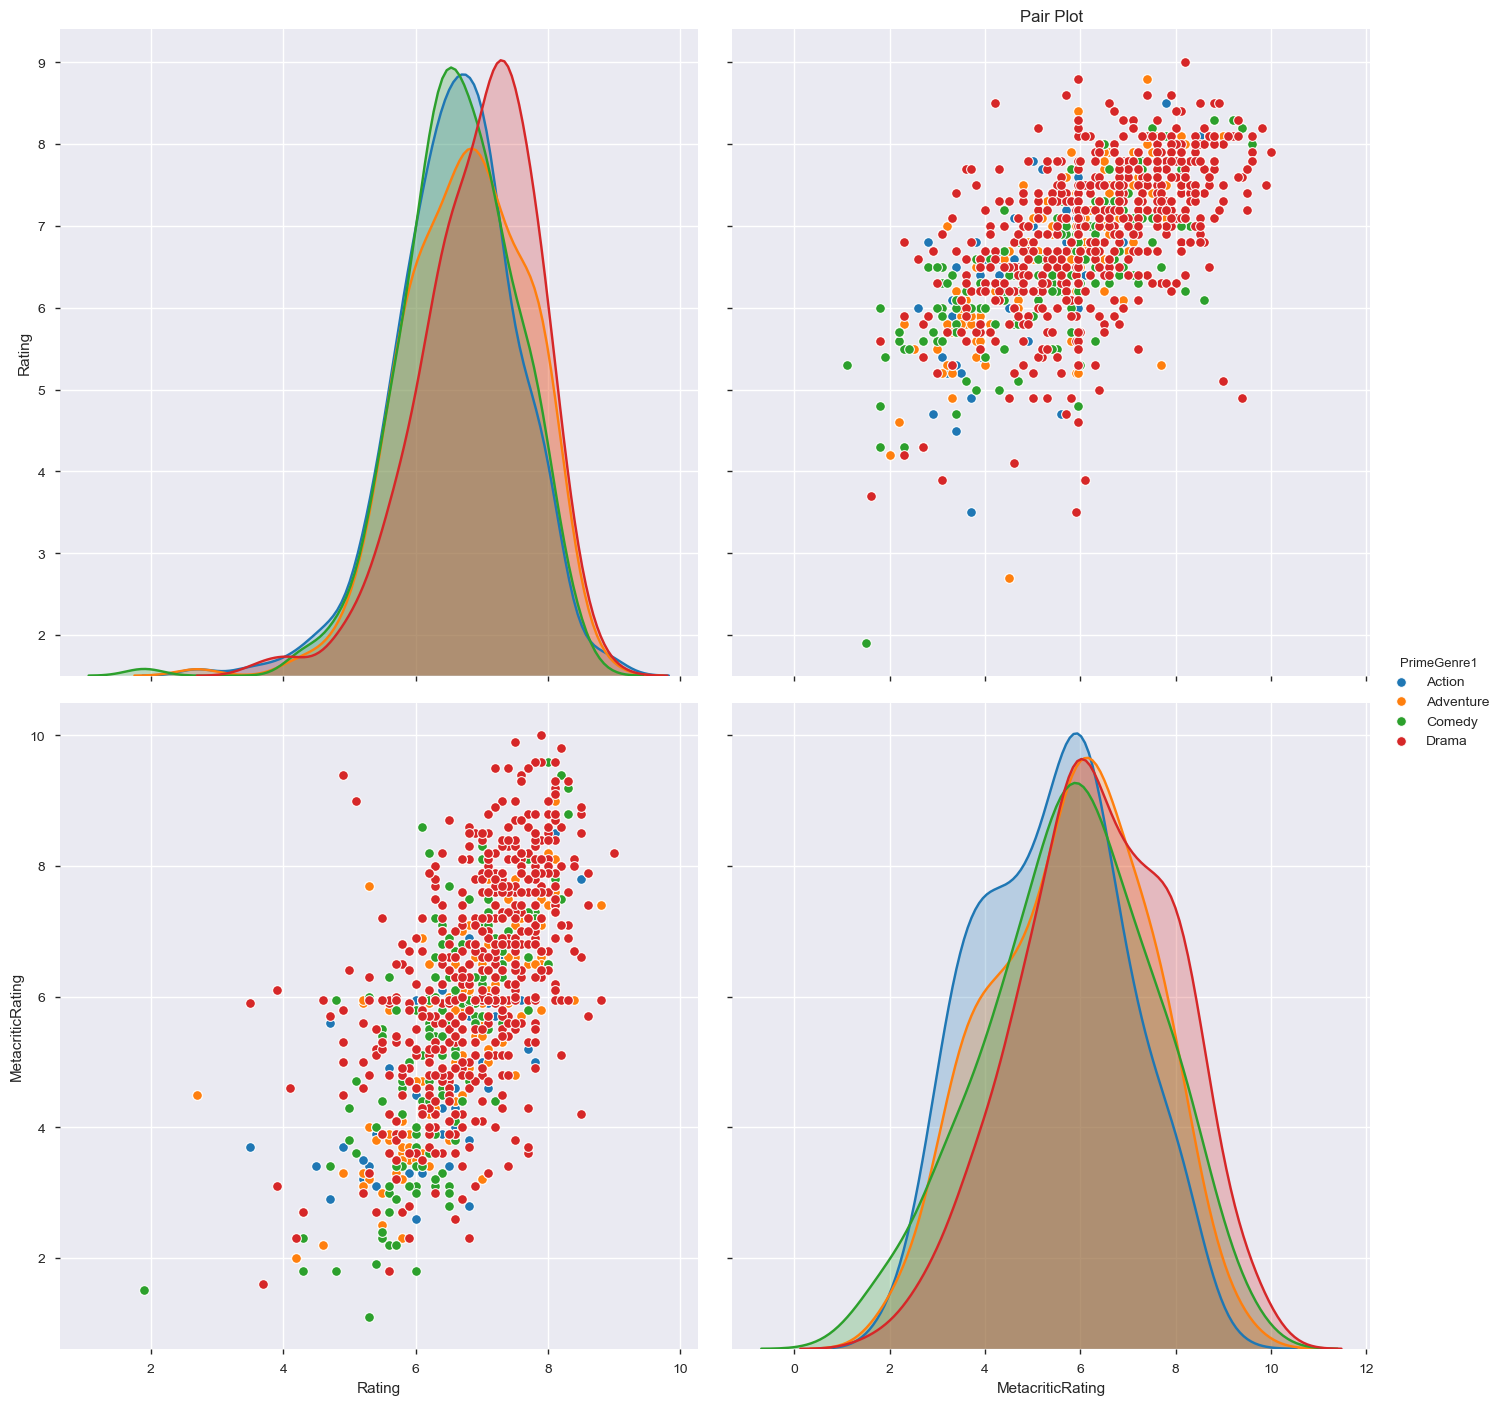

In [70]:
plt.figure(figsize=(20,6))
sns.pairplot(movies[["Rating","MetacriticRating","PrimeGenre1"]],vars =["Rating","MetacriticRating"],hue="PrimeGenre1",  height=7,dropna=True)
plt.title('Pair Plot')